In [25]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
from tensorflow.keras import layers, models

class HouseNet():

    @staticmethod
    def build():
        bathroom_input = layers.Input((32, 32, 3))

        x = layers.Conv2D(16, (3, 3), padding="same",activation="relu")(bathroom_input)
        x = layers.MaxPool2D((2, 2))(x)
        x = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(x)
        x = layers.MaxPool2D((2, 2))(x)

        bedroom_input = layers.Input((32, 32, 3))
        y = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(bedroom_input)
        y = layers.MaxPool2D((2, 2))(y)
        y = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(y)
        y = layers.MaxPool2D((2, 2))(y)

        frontal_input = layers.Input((32, 32, 3))
        z = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(frontal_input)
        z = layers.MaxPool2D((2, 2))(z)
        z = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(z)
        z = layers.MaxPool2D((2, 2))(z)

        kitchen_input = layers.Input((32, 32, 3))
        w = layers.Conv2D(16, (3, 3), padding="same",
                          activation="relu")(kitchen_input)
        w = layers.MaxPool2D((2, 2))(w)
        w = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(w)
        w = layers.MaxPool2D((2, 2))(w)
        

        concat_inputs = layers.concatenate([x, y, z, w], axis = 2)
        flat_layer = layers.Flatten()(concat_inputs)
        out = layers.Dense(100, activation="relu")(flat_layer)
        out = layers.Dense(1, activation="linear")(out)

        net = models.Model(
            inputs=[bathroom_input, bedroom_input, frontal_input, kitchen_input], outputs=out)

        return net

    @staticmethod
    def load_model():
        pass

    @staticmethod
    def save_model():
        pass

we review 3 way to Define our Loss function:

1-function

2-function-to-function

3-OOP

- Huber LOss

- first approach (function)

In [32]:
def huber_loss(y_true, y_pred):

    delta = 1
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta #True -False vector
    small_error_loss = tf.square(error) / 2 
    big_error_loss = delta * (tf.abs(error) - (0.5 * delta))
    return tf.where(is_small_error, small_error_loss, big_error_loss)


- second approach (function-to-function)

In [33]:
def MY_Huber_loss_with_delta(delta):

  def huber_loss(y_true, y_pred):

    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta #True -False vector
    small_error_loss = tf.square(error) / 2 
    big_error_loss = delta * (tf.abs(error) - (0.5 * delta))
    return tf.where(is_small_error, small_error_loss, big_error_loss)
  return huber_loss


Third Approach(OOP)==>Define a Class

In [48]:
import keras
from  keras.losses import Loss

class HuberLoss(Loss):

  def __init__ (self,delta):
    super().__init__()
    self.delta = delta

  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= self.delta #True -False vector
    small_error_loss = tf.square(error) / 2 
    big_error_loss = self.delta * (tf.abs(error) - (0.5 * self.delta))
    return tf.where(is_small_error, small_error_loss, big_error_loss)


In [ ]:
import cv2
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

bathroom_list = []
bedroom_list = []
frontal_list = []
kitchen_list = []
label_list = []
txt_dir = '/content/drive/MyDrive/session2/Multi Input Classification/Multi Input Classification/HousesInfo.txt'
df = pd.read_csv(txt_dir, sep = " ",
                    names=["col_1", "col_2", "col_3", "col_4", "price"])

labels = np.array(df.loc[:, "price"])

labels = labels/np.max(labels)
#print('price:', labels)

def preprocess(img):

        img = cv2.resize(img, (32, 32))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img/255.0

        return img
dir = '/content/drive/MyDrive/session2/Multi Input Classification/Multi Input Classification/house_dataset//*.jpg'
for i, item in enumerate(glob.glob(dir)):
        
    image = cv2.imread(item)
    image = preprocess(image)
    location = item.split("/")[-1].split("_")[-1].split(".")[0]   #item = file directory
    #print(location)

    if   location == "bathroom": bathroom_list.append(image)
    elif location == "bedroom": bedroom_list.append(image)
    elif location == "frontal": frontal_list.append(image)
    elif location == "kitchen": kitchen_list.append(image)

    if i % 100 == 0:
        print("[INFO]: {}/2500 processed".format(i))

bathroom_list = np.array(bathroom_list)
bedroom_list = np.array(bedroom_list)
frontal_list = np.array(frontal_list)
kitchen_list = np.array(kitchen_list)

split = train_test_split(bathroom_list, bedroom_list,
                         frontal_list, kitchen_list,labels,  test_size=0.2)

(bathroom_train, bathroom_test, bedroom_train, bedroom_test, 
 frontal_train, frontal_test, kitchen_train, kitchen_test, labels_train, labels_test) = split
print(len(labels_test))



Epoch 1/40
14/14 [==============================] - 3s 129ms/step - loss: 0.2184 - val_loss: 0.0075
Epoch 2/40
14/14 [==============================] - 2s 112ms/step - loss: 0.0040 - val_loss: 0.0063
Epoch 3/40
14/14 [==============================] - 2s 112ms/step - loss: 0.0032 - val_loss: 0.0061
Epoch 4/40
14/14 [==============================] - 2s 113ms/step - loss: 0.0031 - val_loss: 0.0061
Epoch 5/40
14/14 [==============================] - 2s 115ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 6/40
14/14 [==============================] - 2s 113ms/step - loss: 0.0030 - val_loss: 0.0061
Epoch 7/40
14/14 [==============================] - 2s 112ms/step - loss: 0.0028 - val_loss: 0.0061
Epoch 8/40
14/14 [==============================] - 2s 112ms/step - loss: 0.0027 - val_loss: 0.0065
Epoch 9/40
14/14 [==============================] - 2s 114ms/step - loss: 0.0025 - val_loss: 0.0064
Epoch 10/40
14/14 [==============================] - 2s 113ms/step - loss: 0.0023 - val_loss: 0.0064

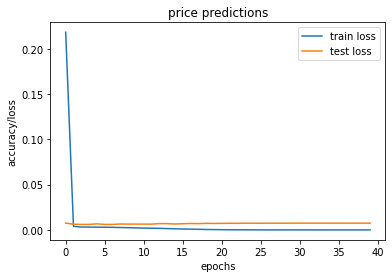

In [49]:
net = HouseNet.build()
'''
net.compile(optimizer="adam",
            loss = "MSE")
'''
'''
net.compile(optimizer="adam",
            loss = "huber_loss")
'''
'''
net.compile(optimizer="adam",
            loss = MY_Huber_loss_with_delta(delta=1))
'''
net.compile(optimizer="adam",
            loss = HuberLoss(delta=1))

H = net.fit(x = [bathroom_train, bedroom_train, frontal_train, kitchen_train],
            y = labels_train,
            validation_data = ( [bathroom_test, bedroom_test, frontal_test, kitchen_test], labels_test),
            epochs=40,
            verbose = 1)

plt.plot(H.history["loss"], label="train loss")
plt.plot(H.history["val_loss"], label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy/loss")
plt.title("price predictions")
plt.show()